In [49]:
import regex as re
import matplotlib.pyplot as plt
import numpy as np

In [50]:
# load the enable word list in an array
with open('public/enable_word_list.txt') as f:
    word_list = f.read().splitlines()
print(len(word_list))

172820


In [51]:
# filter out any words that have any non A-Z or a-z characters using regex
word_list = [word for word in word_list if re.match('^[a-zA-Z]+$', word)]
print(len(word_list))

172820


In [52]:
# filter out any words that are present in the list at https://raw.githubusercontent.com/coffee-and-fun/google-profanity-words/main/data/list.txt
# first need to download the list to /tmp/profanity_list.txt
# Download:
!curl https://raw.githubusercontent.com/coffee-and-fun/google-profanity-words/main/data/list.txt > /tmp/profanity_list.txt
# Load:
with open('/tmp/profanity_list.txt') as f:
    profanity_list = f.read().splitlines()
print(len(profanity_list))

# filter out any words that are present in the profanity list
word_list = [word for word in word_list if word not in profanity_list]
print(len(word_list))

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  8384  100  8384    0     0  39945      0 --:--:-- --:--:-- --:--:-- 40502
958
172580


In [53]:
# now keep only the words in the list provided in https://raw.githubusercontent.com/sapbmw/Longman-Communication-3000/master/Longman_Communication_3000.txt
# first need to download the list to /tmp/longman_list.txt
# Download:
!curl https://raw.githubusercontent.com/sapbmw/Longman-Communication-3000/master/Longman_Communication_3000.txt > /tmp/longman_list.txt
# Load:
with open('/tmp/longman_list.txt') as f:
    longman_list = [s.strip() for s in f.read().splitlines()]
print(len(longman_list))

# filter out any words that are not present in the longman list
word_list = [word for word in word_list if word in longman_list]
print(len(word_list))

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 29694  100 29694    0     0   122k      0 --:--:-- --:--:-- --:--:--  123k
3169
3123


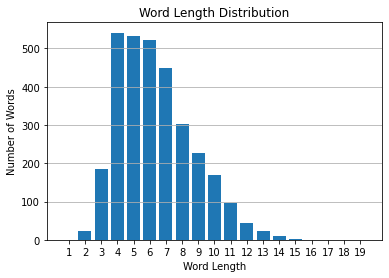

In [54]:
plt.bar(np.arange(1, 20), [len([word for word in word_list if len(word) == i]) for i in range(1, 20)])
plt.xlabel('Word Length')
plt.ylabel('Number of Words')
plt.title('Word Length Distribution')
plt.xticks(np.arange(1, 20))
plt.grid(axis='y')
plt.show()

In [55]:
# remove any words that are less than 4 characters long
word_list = [word for word in word_list if len(word) >= 4]
print(len(word_list))

2913


In [56]:
# remove any words that are more than 10 characters long
word_list = [word for word in word_list if len(word) <= 10] 
print(len(word_list))

2742


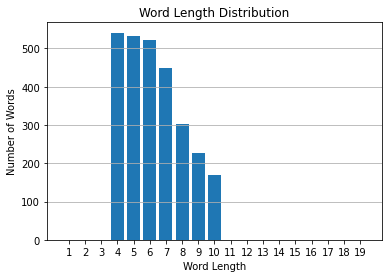

In [57]:
plt.bar(np.arange(1, 20), [len([word for word in word_list if len(word) == i]) for i in range(1, 20)])
plt.xlabel('Word Length')
plt.ylabel('Number of Words')
plt.title('Word Length Distribution')
plt.xticks(np.arange(1, 20))
plt.grid(axis='y')
plt.show()

In [58]:
# save the list to public/game_word_list.txt
with open('public/game_word_list.txt', 'w') as f:
    for word in word_list:
        f.write(word + '\n')